In [14]:
# Installing required packages:
# pip tensorflow-determinism 
# pip install numpy
# pip install opencv-python
# pip install scikit-learn
# pip install keras
# pip install tensorflow
# pip install matplotlib
# pip install pandas

# Importing libraries, packages and environment set-up
from glob import glob # For reading data
import os
import random
import numpy as np # For storing large data in NP Arrays
import time
import cv2 # For image processing
import sklearn # For machine learning
import tensorflow as tf # For CNN
from tensorflow import keras # For CNN
import matplotlib.pyplot as plt # For data visualizing
from sklearn.model_selection import train_test_split # For splitting data into training set and testing set
from tensorflow.keras.models import Sequential # For NN
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization # For adding CNN convolution layers
from tensorflow.keras.optimizers import Adam # For Learning Rate
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping # For saving model and stop training model earlier if needed
from tensorflow.keras.applications import ResNet50 # For using ResNet-50 Model

# Function of generating graph for CNN performance evaluations
def plotPerformance(hist,mn,do,lr,bs):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history['val_accuracy'])
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title("model accuracy")
    plt.ylabel("Accuracy")
    plt.xlabel("Epoch")
    plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
    plt.savefig(f'pics/{mn}_{do}do{lr}lr{bs}bs.png')
    plt.show()

# Function of loading photos as the data
def getData():
    real = glob("../vectors/original/*")
    fake_all = glob("../vectors/manipulated/*")
    trainX = []
    trainY = np.hstack((np.ones(len(real), dtype=int),np.zeros(len(fake_all),dtype=int)))
    l = len(real+fake_all)
    for img_path in (real+fake_all):
        trainX.append(np.array(cv2.resize(cv2.imread(img_path),(150,150))) / 255.0)
        if(len(trainX)%(0.1*l)==0):print(f'process: {100*len(trainX)/l}%**')
    return np.asarray(trainX), trainY


# Main program
all_X,all_Y = getData()
trainX, testX, trainY, testY = train_test_split(all_X,all_Y,test_size=0.2, random_state=4487)
print(trainX.shape)
print(trainY.shape)

process: 10.0%**
process: 20.0%**
process: 30.0%**
process: 40.0%**
process: 50.0%**
process: 60.0%**
process: 70.0%**
process: 80.0%**
process: 90.0%**
process: 100.0%**
(96, 150, 150, 3)
(96,)


Initialising configs...
Please enter the dropout rate: 0.2
Please enter the learning rate: 3e-4
Please enter the # of epochs: 1
Please enter the # of batch size: 32
working on CNN model
3/3 [==============================] - ETA: 0s - loss: 30.1717 - accuracy: 0.5000
Epoch 1: val_accuracy improved from -inf to 0.58333, saving model to ConvNet.h5
3/3 [==============================] - 20s 7s/step - loss: 30.1717 - accuracy: 0.5000 - val_loss: 2.7064 - val_accuracy: 0.5833


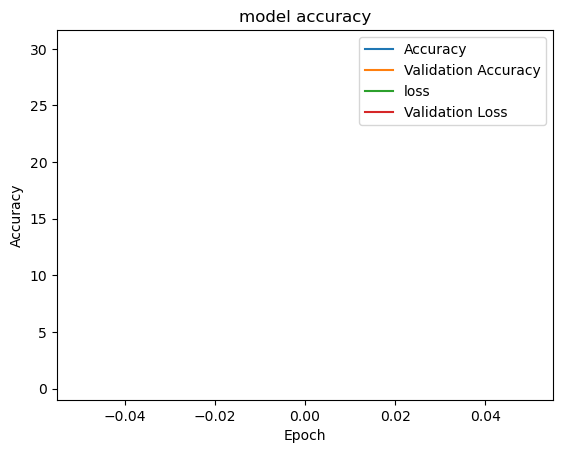

In [17]:
# CNN model

# Setting seed for constructing the same (or at least similar) model
os.environ['TF_CUDNN_DETERMINISTIC']= '1'
os.environ['PYTHONHASHSEED']= '4487'
np.random.seed(4487)
random.seed(4487)
tf.random.set_seed(4487)

print('Initialising configs...')
# do=0.23
# lr=1e-4
# epoch=5
# bs=64
mn = "CNN"
do = input('Please enter the dropout rate: ') 
lr = input('Please enter the learning rate: ')
epoch = input('Please enter the # of epochs: ')
bs = input('Please enter the # of batch size: ')

# CNN
print('working on CNN model')
model = Sequential()

# First convolutional layer (7x7 kernel)
model.add(Conv2D(32, 7, activation='relu', padding='same', input_shape=(150,150,3)))
model.add(BatchNormalization()) # Normalizing input (mean close to 0 & S. close to 1)

# Second convolutional layer (5x5 kernel)
model.add(Conv2D(32, 5, activation='relu', padding='same', kernel_initializer='he_uniform')) 
model.add(BatchNormalization())

# Third convolutional layer (3x3 kernel)
model.add(Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_uniform'))
model.add(BatchNormalization())

# Forth convolutional layer (3x3 kernel)
model.add(Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_uniform')) 
model.add(BatchNormalization()) 

# Fifth convolutional layer (3x3 kernel)
model.add(Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_uniform')) 
model.add(BatchNormalization())

model.add(MaxPooling2D()) # Downsample the input
model.add(Flatten()) # Flatten the input

# Output
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform')) 
model.add(Dropout(float(do))) # For preventing overfitting
model.add(Dense(1, activation='sigmoid'))

# Compiling the model using binary_crossentropy loss function and evalutate accuracy score
model.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=float(lr)), metrics=['accuracy']) 

# Early stop the program if the val_loss does not improve for 5 epochs
early_stopping = EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 5, verbose = 0, mode = 'min', restore_best_weights=True) 

# Saving the best model according to val_accuracy (accuracy of testing)
checkpoint = ModelCheckpoint("ConvNet.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto') 

# Fitting the model
tf.random.set_seed(4487)
CNN_hist=model.fit(trainX,trainY,epochs=int(epoch),batch_size=int(bs),validation_data=(testX,testY), callbacks=[checkpoint, early_stopping])

# Plot the graph and save the performance
plotPerformance(CNN_hist,mn,str(do),str(lr),str(bs))
t = np.reshape(np.hstack((np.array(CNN_hist.history['accuracy']),np.array(CNN_hist.history['val_accuracy']),np.array(CNN_hist.history['loss']),np.array(CNN_hist.history['val_loss']))),(len(CNN_hist.history['accuracy']),4),'F')
np.save(f"vectors/CNN_{do}do{lr}lr{bs}bs",t)


Initialising configs...
Please enter the dropout rate: 0.2
Please enter the learning rate: 3e-4
Please enter the # of epochs: 1
Please enter the # of batch size: 32
3/3 [==============================] - ETA: 0s - loss: 1.6064 - accuracy: 0.6354
Epoch 1: val_accuracy improved from -inf to 0.66667, saving model to ResNet.h5
3/3 [==============================] - 31s 7s/step - loss: 1.6064 - accuracy: 0.6354 - val_loss: 0.6894 - val_accuracy: 0.6667


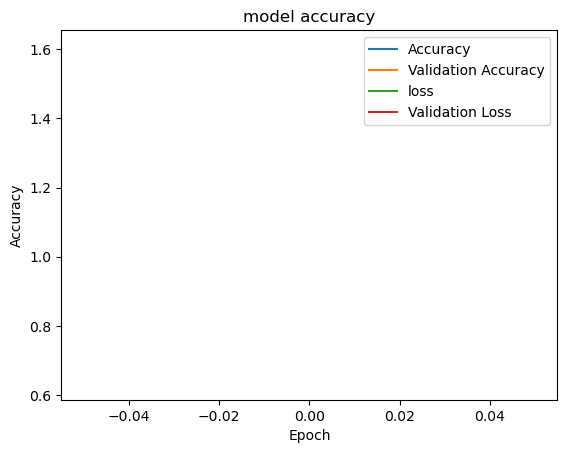

In [18]:
# Resnet model

# Setting seed for constructing the same (or at least similar) model
os.environ['TF_CUDNN_DETERMINISTIC']= '1'
os.environ['PYTHONHASHSEED']= '4487'
np.random.seed(4487)
random.seed(4487)
tf.random.set_seed(4487)

print('Initialising configs...')
# do=0.23
# lr=1e-4
# epoch=5
# bs=64
mn = "RESNET"
do = input('Please enter the dropout rate: ') 
lr = input('Please enter the learning rate: ')
epoch = input('Please enter the # of epochs: ')
bs = input('Please enter the # of batch size: ')
ResNet_model = Sequential()

# Adding ResNet50 layer
ResNet_model.add(ResNet50(weights='imagenet', include_top=False, classes=2, input_shape=(150,150,3))) 
ResNet_model.add(BatchNormalization()) # Normalizing input (mean close to 0 & standart deviation close to 1)

ResNet_model.add(MaxPooling2D()) # Downsample the input
ResNet_model.add(Flatten()) # Flatten the input

# Output
ResNet_model.add(Dense(128, activation='relu', kernel_initializer = 'he_uniform')) # output = activation(dot(input, kernel) + bias)
ResNet_model.add(Dropout(float(do))) # For preventing overfitting
ResNet_model.add(Dense(1, activation = 'sigmoid'))

# Compiling the model using binary_crossentropy loss function and evalutate accuracy score
ResNet_model.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=float(lr)), metrics=['accuracy']) 

# ResNet_model = load_model(filepath="ResNet.h5", compile=True)
# Early stop the program if the val_loss does not improve for 5 epochs
early_stopping = EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 10, verbose = 0, mode = 'min', restore_best_weights=True) 

# Saving the best model according to val_accuracy (accuracy of testing)
checkpoint = ModelCheckpoint("ResNet.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto') 

# Fitting the model
tf.random.set_seed(4487)
ResNet_hist=ResNet_model.fit(trainX,trainY,epochs=int(epoch),batch_size = int(bs),validation_data=(testX,testY), callbacks=[checkpoint, early_stopping]) 

# Plot the graph and save the performance
plotPerformance(ResNet_hist,mn,str(do),str(lr),str(bs))
t = np.reshape(np.hstack((np.array(ResNet_hist.history['accuracy']),np.array(ResNet_hist.history['val_accuracy']),np.array(ResNet_hist.history['loss']),np.array(ResNet_hist.history['val_loss']))),(len(ResNet_hist.history['accuracy']),4),'F')
np.save(f"vectors/RESNET_{do}do{lr}lr{bs}bs",t)
